<div dir=rtl>

## מעבדה לפיסיקה 2

</center>

<h1><center>התנגדות</center></h1>

<div dir=rtl>

תיעוד ניסוי "התנגדות"<br>
    <font color='red'>אין קובץ עזר זה מחליף את תדריך הניסוי! למהלך הניסוי, יש לפנות לתדריך הניסוי!</font>
    
    גרסה 0.15
    
***
<div dir=rtl>
תאריך:
<div dir=rtl>
עמדה:
<div dir=rtl>
מבצעים/ות:


***
<div dir=rtl> <b> הערות: </b> <br>
    .
    
.
    
.
    
.
    

<div dir=rtl>

### ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות

In [43]:
import itertools

import numpy as np  # math functions
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
from scipy.integrate import cumulative_trapezoid  # numerical integration
from scipy.stats import linregress  # linear regression

<div dir=rtl>
<h3>
   מתוך שאלות ההכנה:
</h3>

<div class="alert alert-block alert-danger", dir=rtl>
<b>טיפ:</b> נחוץ מקור לכל ציטוט ערך ספרותי
</div>

In [44]:
# Resistivity (Ohm·m)
rho_lit_Cu = 1.68e-8  # Source: https://en.wikipedia.org/wiki/Electrical_resistivity_and_conductivity
rho_lit_Mo = 5.34e-8  # Source: https://www.rsc.org/periodic-table/element/42/molybdenum

# Resistance of a diameter=0.07mm, length=20cm wire:

diameter = 0.07e-3  # meters
length = 0.2  # meters
area = np.pi * (diameter / 2) ** 2  # cross-sectional area in m^2

R_Cu = rho_lit_Cu * length / area
R_Mo = rho_lit_Mo * length / area

# Density (kg/m³)
dens_lit_Cu = 8960  # Source: https://en.wikipedia.org/wiki/Copper
dens_lit_Mo = 10280  # Source: https://www.rsc.org/periodic-table/element/42/molybdenum

# Heat capacity (J/kg·K)
hc_lit_Cu = 384.7  # Source: https://www.engineeringtoolbox.com/specific-heat-capacity-d_391.html
hc_lit_Mo = 251  # Source: https://www.webelements.com/molybdenum/physics.html

# Temperature coefficient of resistance (1/°C)
alpha_lit_Cu = 0.0039  # Source: https://www.engineeringtoolbox.com/temperature-resistance-d_755.html
alpha_lit_Mo = 0.0045  # Source: https://www.analog.com/en/resources/technical-articles/metal-selection-for-pcb-thermal-management.html

<h1>
    מהלך הניסוי 
<a id="mahalah"></a>
</h1>

<h3>
   מדידות מקדימות:
</h3>

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> המולטימטר הוא הכלי היעודי שלנו למדידת התנגדות.
</div>

In [45]:
# זכרו להשתמש במולטימטר בשביל למדוד את ההתנגדות
# High wattage resistor:
R_0 = .356
R_0_err = (R_0 * 0.050 + 0.008 * 100) / 100

# Wire resistors:
# 
R_1 = .907
R_1_err = (R_1 * 0.050 + 0.008 * 100) / 100
#
R_2 = .914
R_2_err = (R_2 * 0.050 + 0.008 * 100) / 100
#
R_3 = 2.604
R_3_err = (R_3 * 0.050 + 0.008 * 100) / 100
#
R_4 = 2.599
R_4_err = (R_4 * 0.050 + 0.008 * 100) / 100

R_1, R_1_err

(0.907, 0.008453500000000001)

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ההתנגדות המדודה תואמת לצפוי (לפי פירוט הנגד\מבנה התיל?)
</div>

<h3>
   מדידת פולס
</h3>


C:\Users\itama\AppData\Local\Temp\ipykernel_42388\837767731.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


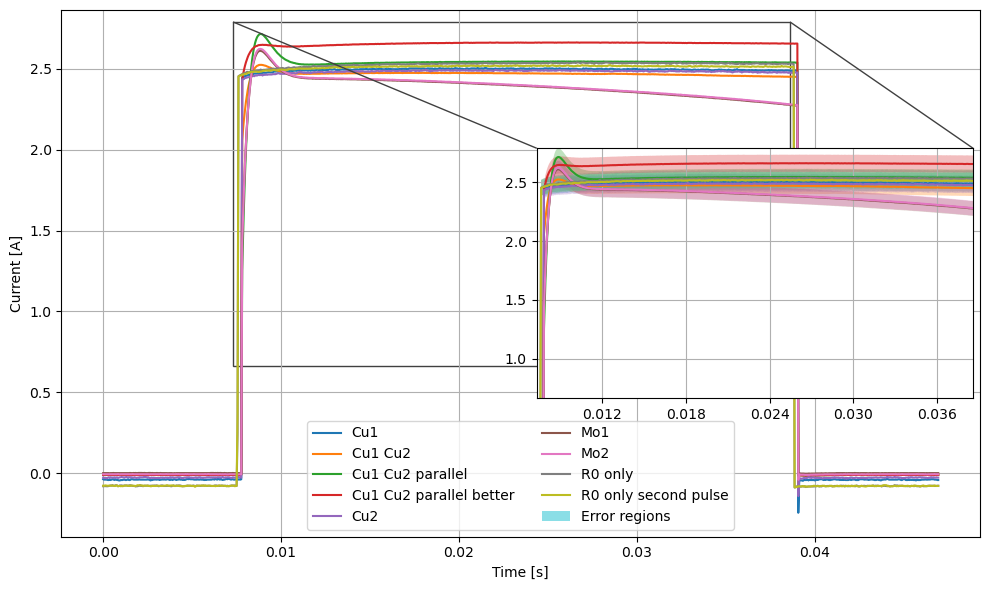

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import MaxNLocator

def importData(filename):
    try:
        t, v1 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 5]).T
    except ValueError:
        t, v1 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 4]).T
    t -= t[0]

    return t, v1

# Assume R_0 and R_0_err are defined elsewhere:
voltage_rel_err = 0.015
eps = 1e-12

def current_error(Vx):
    V_err = voltage_rel_err * Vx
    rel_err = np.hypot(V_err / (Vx + eps), R_0_err / R_0)
    return Vx / R_0 * rel_err

fig, ax = plt.subplots(figsize=(10, 6))

filenames = [
    "Cu1", "Cu1_Cu2", "Cu1_Cu2_parallel", "Cu1_Cu2_parallel_better",
    "Cu2", "Mo1", "Mo2", "R0_only", "R0_only_second_pulse"
]

# Main plot
for name in filenames:
    full_filename = name + ".CSV"
    t, Vx = importData(full_filename)
    I = Vx / R_0
    ax.plot(t, I, label=name.replace("_", " "))

ax.set_xlabel('Time [s]')
ax.set_ylabel('Current [A]')
ax.legend(ncol=2)
ax.grid()

# Inset zoom plot
axins = inset_axes(ax, width="47.5%", height="47.5%", loc='center right')

I_zoom_all_min = float('inf')
I_zoom_all_max = float('-inf')

for name in filenames:
    full_filename = name + ".CSV"
    t, Vx = importData(full_filename)
    I = Vx / R_0

    start, end = 140, -160
    t_zoom = t[start:end]
    I_zoom = I[start:end]

    I_err_zoom = current_error(Vx)[start:end]

    # Plot original line
    axins.plot(t_zoom, I_zoom)

    # Add shaded error region without changing line style
    axins.fill_between(t_zoom, I_zoom - I_err_zoom, I_zoom + I_err_zoom, alpha=0.3)

    I_zoom_all_min = .66 or min(I_zoom_all_min, np.min(I_zoom - I_err_zoom))
    I_zoom_all_max = max(I_zoom_all_max, np.max(I_zoom + I_err_zoom))

# Set zoomed axes limits
axins.set_xlim(t_zoom[0], t_zoom[-1])
axins.set_ylim(I_zoom_all_min, I_zoom_all_max)
axins.grid()

mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec=".25")

axins.xaxis.set_major_locator(MaxNLocator(nbins=6))
axins.yaxis.set_major_locator(MaxNLocator(nbins=5))
plt.tight_layout()
import matplotlib.patches as mpatches

# When plotting your shaded region:
fill = axins.fill_between(t_zoom, I_zoom - I_err_zoom, I_zoom + I_err_zoom, alpha=0.3)

# Create a custom patch for the legend (match facecolor and alpha)
fc = fill.get_facecolor()[0]            # e.g. (r, g, b, 0.3)
fc_new_alpha = (fc[0], fc[1], fc[2], .5) # set alpha to 1
error_patch = mpatches.Patch(facecolor=fc_new_alpha, label='Error region')

# Then add to legend along with line handles:
handles, labels = ax.get_legend_handles_labels()
handles.append(error_patch)
labels.append('Error regions')

ax.legend(handles=handles, labels=labels, ncol=2, loc='lower center')

# ax.legend(ncol=2, loc="lower center")#, bbox_to_anchor=(0.5, 1.02), ncol=2)
plt.savefig("time_to_current.svg", format="svg")
plt.show()


<div dir=rtl>
    <h3>
    מדידת התנגדות # (תיל: )
</h3>

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> מה צפויות להיות יחידות הזמן? איך נרצה "לחתוך" את הצגת האות שלנו כדי להתמקד בעיקר?
</div>

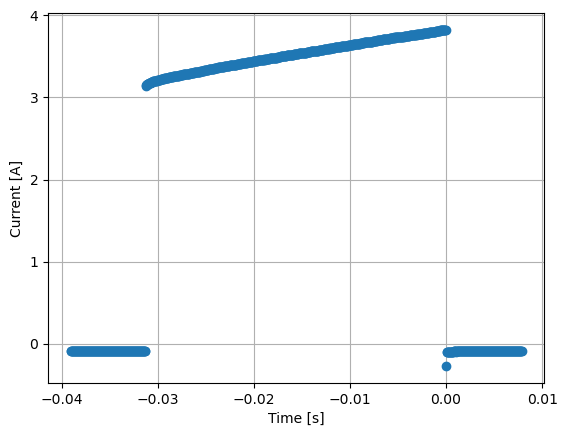

In [47]:
def importData(filename):
    # use skiprows to skip the scope setup information
    # usecols column numbers starting from 0
    return np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 4, 5]).T


name = "Cu1.CSV"
t, Vx, Vy = importData(name)

### We can use indice slicing to focus only on the data we're interested in:
t0 = 0  # ms
t1 = 30e-3  # ms
interval = (t > t0) & (t < t1)
# t = t[interval]
# Vy = Vy[interval]

### plotting:
plt.plot(t, Vx, 'o', label='Voltage [V]')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
# plt.legend()
plt.grid()


In [48]:
### plotting:
# plt.plot(t, Vx, 'o', label='Voltage [V]')
# plt.xlabel('Time [s]')
# plt.ylabel('Current [A]')
# # plt.legend()
# plt.grid()

$$ \Delta Q(t) = \int_0^t I(t')V(t') dt' $$

$$ R(t) = R_{t=0}\left(1+\frac{\alpha}{c\cdot m}\Delta Q(t)\right) $$

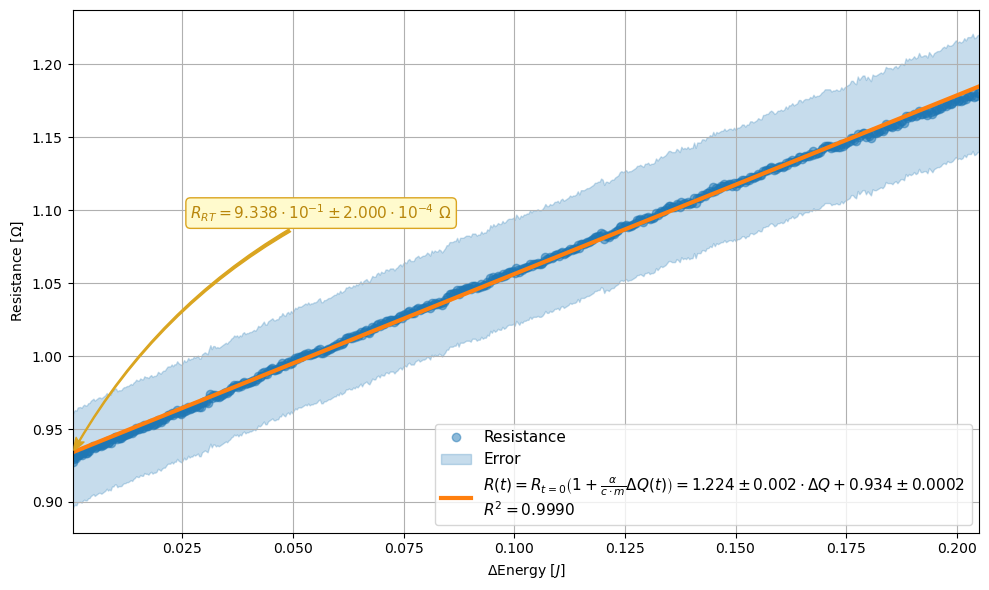

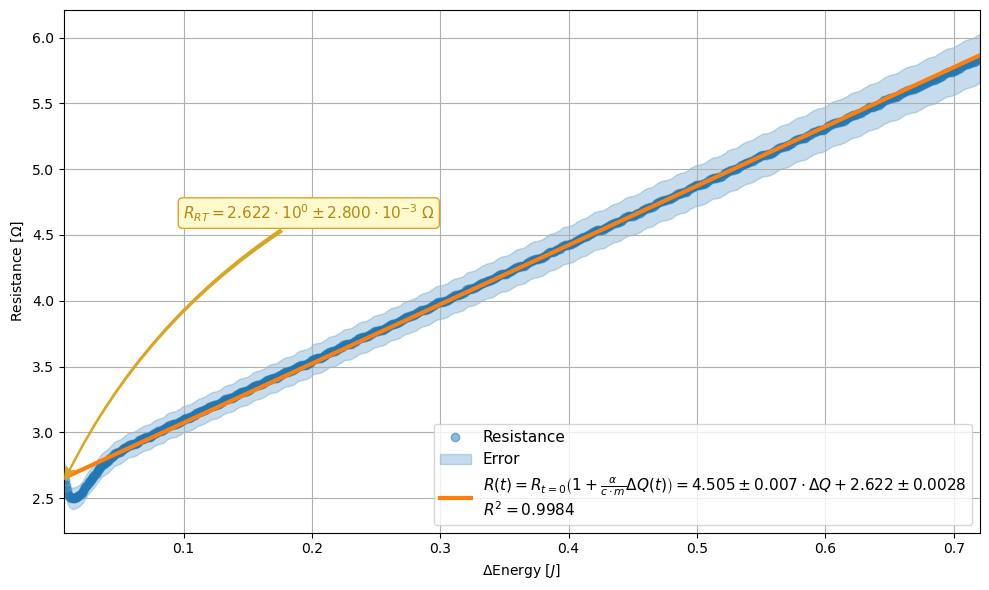

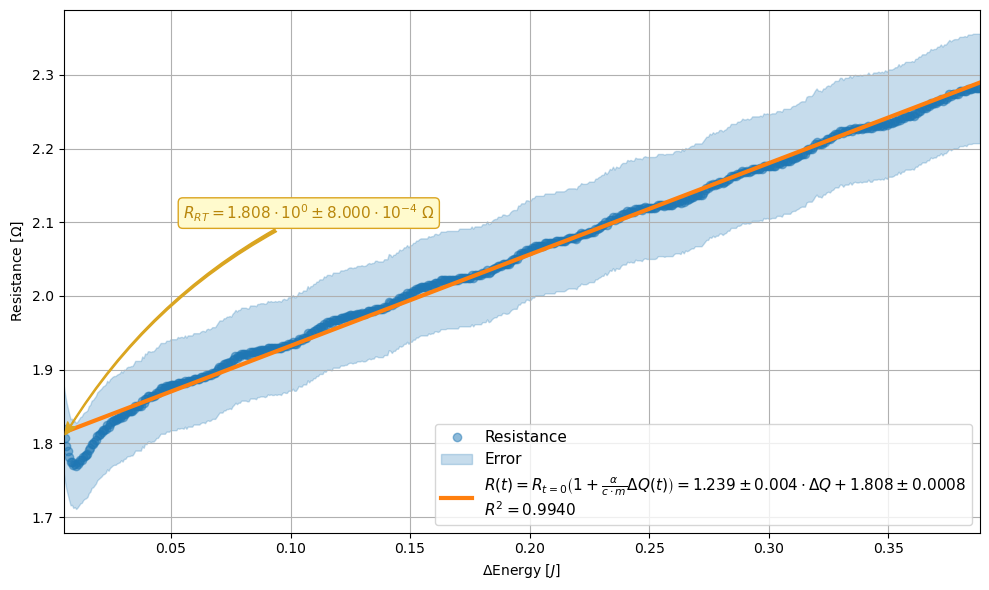

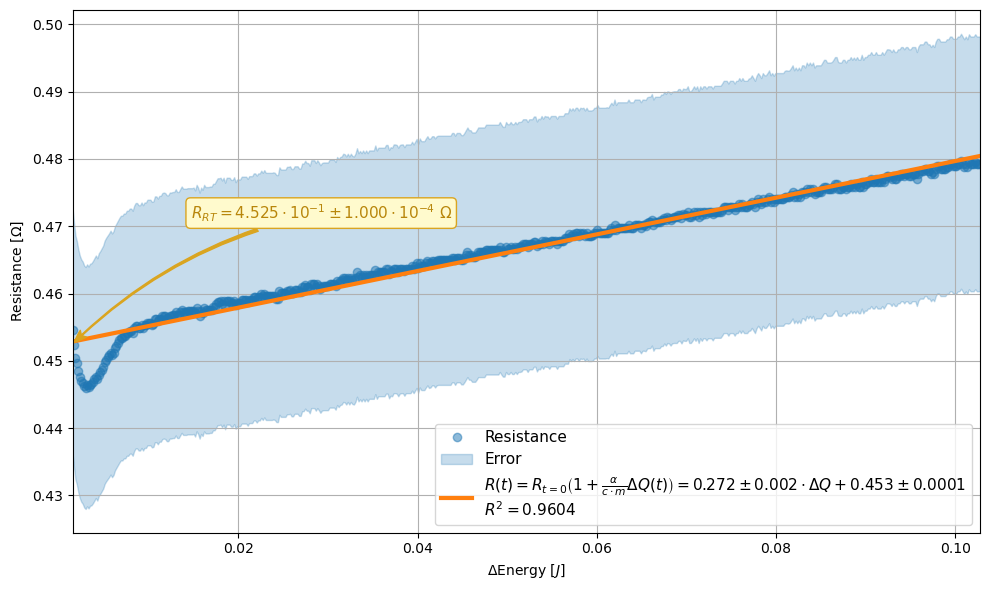

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
from scipy.stats import linregress, t as scipy_t

def IVRE(time, Vx, Vy):
    current = Vy / R_0
    voltage = Vx - Vy
    energy = cumulative_trapezoid(current * voltage, time, initial=0)
    resistance = voltage / current

    Vy_err = 0.015 * Vy
    Vx_err = 0.015 * Vx
    V_err = np.hypot(Vx_err, Vy_err)

    I_rel_err = np.hypot(Vy_err / Vy, R_0_err / R_0)
    I_err = current * I_rel_err

    R_rel_err = np.hypot(V_err / voltage, I_err / current)
    R_err = resistance * R_rel_err

    power_err = np.hypot(voltage * I_err, current * V_err)
    energy_err = cumulative_trapezoid(power_err, time, initial=0)

    return current, voltage, resistance, energy, I_err, V_err, R_err, energy_err

def plot_resistance_to_energy(name: str):
    time, Vx, Vy = importData(name + ".CSV")

    current, voltage, resistance, energy, I_err, V_err, R_err, energy_err = IVRE(time, Vx, Vy)

    start = np.argmin(resistance[140:160]) + 140
    end = 750

    sliced_resistance = resistance[start:end]
    sliced_energy = energy[start:end]
    sliced_R_err = R_err[start:end]
    sliced_energy_err = energy_err[start:end]

    plt.figure(figsize=(10, 6))

    # Data points
    plt.plot(sliced_energy, sliced_resistance, 'o', label='Resistance', alpha=0.5)

    # Shaded error region for data
    plt.fill_between(sliced_energy,
                     sliced_resistance - sliced_R_err,
                     sliced_resistance + sliced_R_err,
                     color='C0', alpha=0.25, label='Error')

    # Linear fit
    fit = linregress(sliced_energy, sliced_resistance)
    x_lin = fit.slope * sliced_energy + fit.intercept

    # Add LaTeX equation to legend
    digits_amount = 4
    slope = round(fit.slope, digits_amount)
    slope_err = round(fit.stderr, digits_amount)
    intercept = round(fit.intercept, digits_amount)
    intercept_err = round(fit.intercept_stderr, digits_amount)

    r_value = str(fit.rvalue)[2:]
    r_value = "".join(itertools.takewhile(lambda c: c == "9", r_value)) + next(filter(lambda c: c!="9", r_value))
    r_value = float("0." + r_value)

    label_fit = (
        fr"$R(t) = R_{{t=0}}\left(1+\frac{{\alpha}}{{c \cdot m}} \Delta Q(t)\right) = "
        fr"{slope:.3f} \pm {slope_err:.3f} \cdot \Delta Q + "
        fr"{intercept:.3f} \pm {intercept_err:.4f}$" "\n"
        fr"$R^2 = {r_value**2:.4f}$"
    )

    # Fit line
    plt.plot(sliced_energy, x_lin, '-', label=label_fit, linewidth=3)

    # Intercept annotation
    intercept_str = (
        rf"{f'{intercept:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept:.3e}'.split('e')[1])}}}"
        rf" \pm "
        rf"{f'{intercept_err:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept_err:.3e}'.split('e')[1])}}}"
    )

    plt.annotate(
        rf'$R_{{RT}} = {intercept_str}\ \Omega$',
        xy=(sliced_energy[0], intercept),
        xytext=(0.13, 0.6),
        textcoords="axes fraction",
        arrowprops=dict(
            arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
            color="goldenrod",
            connectionstyle="arc3,rad=0.15"
        ),
        fontsize=11,
        color="darkgoldenrod",
        bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
        zorder=5
    )

    plt.xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
    plt.xlim(left=sliced_energy[0], right=sliced_energy[-1])
    plt.ylabel(r'Resistance [$\Omega$]')
    plt.grid()
    plt.legend(fontsize=11, loc="lower right")
    plt.tight_layout()
    plt.savefig(f"resistance_to_energy_{name}.svg", format="svg")

for name in ["Cu1", "Mo2", "Cu1_Cu2", "Cu1_Cu2_parallel_better"]:
    plot_resistance_to_energy(name)
plt.show()

In [50]:
cu_ = R_Cu / 2
((4.525)/10 - cu_)/cu_*100

3.6561951067256993

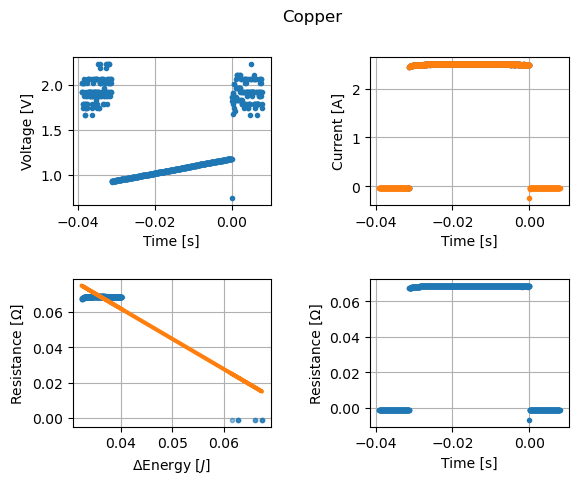

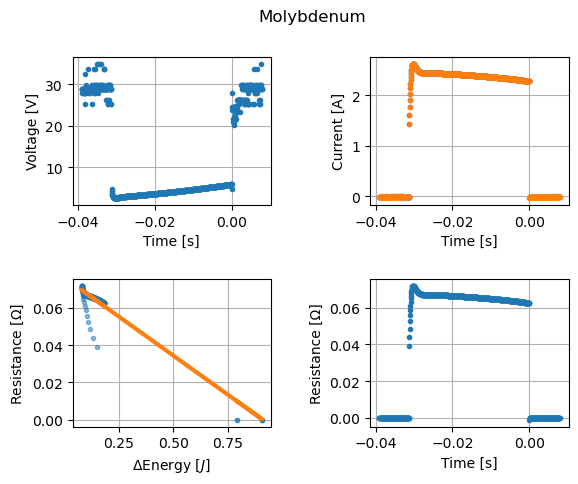

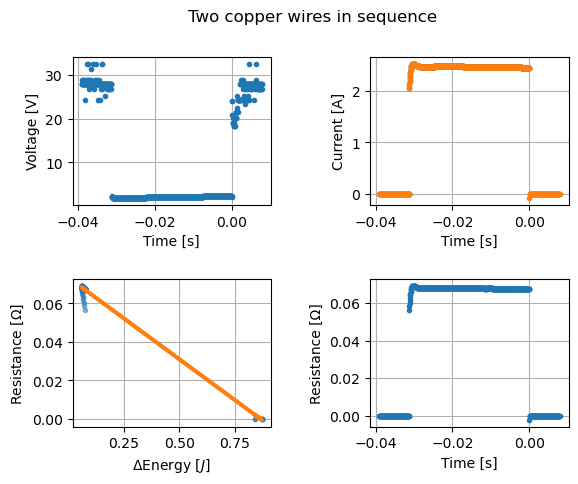

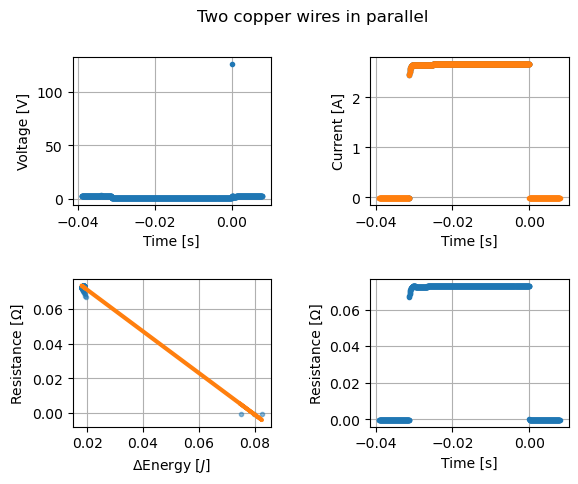

In [51]:
for (title, filename) in (("Copper", "Cu1.CSV"), ("Molybdenum", "Mo2.CSV"), ("Two copper wires in sequence", "Cu1_Cu2.CSV"), ("Two copper wires in parallel", "Cu1_Cu2_parallel_better.CSV")):
    fig, axs = plt.subplots(2,2)
    fig.suptitle(title)
    voltage_plot = axs[0, 0]
    current_plot = axs[0, 1]
    energy_plot = axs[1, 0]
    resistance_plot = axs[1, 1]
    t, Vx, Vy = importData(filename)

    current, _, voltage, _, resistance, _, energy, _ = IVRE(t, Vx, Vy)
    start = np.argmin(resistance[140:160]) + 140
    d_resistance = np.diff(resistance[720:750])
    end = 750  #np.argmax(d_resistance) + 720
    # resistance = resistance[start:end]
    # TODO: Zero measurements

    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    # voltage_plot.plot(t[start:end], voltage[start:end], '.')
    voltage_plot.plot(t, voltage, '.')
    voltage_plot.set_xlabel('Time [s]')
    voltage_plot.set_ylabel('Voltage [V]')
    voltage_plot.grid()

    current_plot.plot(t[start:end], current[start:end], '.')
    current_plot.plot(t, current, '.')
    current_plot.set_xlabel('Time [s]')
    current_plot.set_ylabel('Current [A]')
    current_plot.grid()

    sliced_resistance = resistance[start:end]
    sliced_energy = energy[start:end]

    copper_only = (t[:], energy[:])
    # resistance_plot.plot(t[start:end], sliced_resistance, '.')
    resistance_plot.plot(t, resistance, '.')
    resistance_plot.set_xlabel('Time [s]')
    resistance_plot.set_ylabel('Resistance [Ω]')
    resistance_plot.grid()

    energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Measurements', alpha=0.5)
    energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
    energy_plot.set_ylabel(r'Resistance [$\Omega$]')
    energy_plot.grid()

    # Linear regression
    fit = linregress(sliced_energy, sliced_resistance)
    x_lin = fit.slope * sliced_energy + fit.intercept

    digits_amount = 4
    slope = round(fit.slope, digits_amount)
    slope_err = round(fit.stderr, digits_amount)
    intercept = round(fit.intercept, digits_amount)
    intercept_err = round(fit.intercept_stderr, digits_amount)

    energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
    # TODO: Error bars
    # TODO: Use IEEE notation for bibliography

In [52]:
cu_mass = dens_lit_Cu * (diameter/2) ** 2 * np.pi * length
mo_mass = dens_lit_Mo * (diameter/2) ** 2 * np.pi * length



In [53]:
# COPPERRRRR
regression_R_0 = 0.9338
regression_R_0_err = 2e-4
regression_alpha_c_m = 1.224 / regression_R_0
# regression_alpha_c_m_err = slope_err / regression_R_0_err
regression_alpha_c_m_err = np.hypot(slope_err/1.224, regression_R_0_err/regression_R_0) * regression_alpha_c_m

alpha_c = regression_alpha_c_m * (dens_lit_Cu * length * area)
alpha_c_err = regression_alpha_c_m_err * (dens_lit_Cu * length * area)

print(f"Measured {alpha_c=:.7e} ± {alpha_c_err:.7e}")
theoretical_alpha_c = .00393/hc_lit_Cu
print(f"Calculated {theoretical_alpha_c=:.4e}")
(theoretical_alpha_c-alpha_c)/theoretical_alpha_c*100

Measured alpha_c=9.0396479e-06 ± 4.5829980e-08
Calculated theoretical_alpha_c=1.0216e-05


11.512657798114653

In [54]:
# MO
regression_R_0 = 2.622
regression_R_0_err = 2.8/1000
regression_alpha_c_m = 4.505 / regression_R_0
# regression_alpha_c_m_err = slope_err / regression_R_0_err
regression_alpha_c_m_err = np.hypot(slope_err/4.505, regression_R_0_err/regression_R_0) * regression_alpha_c_m

alpha_c = regression_alpha_c_m * (dens_lit_Mo * length * area)
alpha_c_err = regression_alpha_c_m_err * (dens_lit_Mo * length * area)

print(f"Measured {alpha_c=:.7e} ± {alpha_c_err:.7e}")
theoretical_alpha_c = 0.004579/hc_lit_Mo
print(f"Calculated {theoretical_alpha_c=:.4e}")
(theoretical_alpha_c-alpha_c)/theoretical_alpha_c*100

Measured alpha_c=1.3594749e-05 ± 2.3681580e-08
Calculated theoretical_alpha_c=1.8243e-05


25.47975781801275

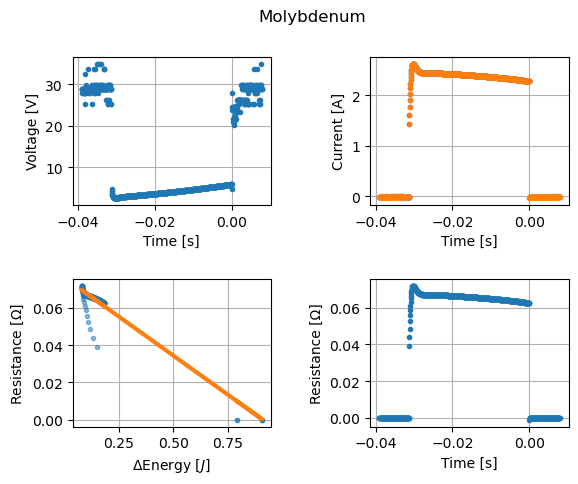

In [55]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Molybdenum")
voltage_plot = axs[0, 0]
current_plot = axs[0, 1]
energy_plot = axs[1, 0]
resistance_plot = axs[1, 1]
t, Vx, Vy = importData("Mo2.CSV")

current, _, voltage, _, resistance, _, energy, _ = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# voltage_plot.plot(t[start:end], voltage[start:end], '.')
voltage_plot.plot(t, voltage, '.')
voltage_plot.set_xlabel('Time [s]')
voltage_plot.set_ylabel('Voltage [V]')
voltage_plot.grid()

current_plot.plot(t[start:end], current[start:end], '.')
current_plot.plot(t, current, '.')
current_plot.set_xlabel('Time [s]')
current_plot.set_ylabel('Current [A]')
current_plot.grid()

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

# resistance_plot.plot(t[start:end], sliced_resistance, '.')
resistance_plot.plot(t, resistance, '.')
resistance_plot.set_xlabel('Time [s]')
resistance_plot.set_ylabel('Resistance [Ω]')
resistance_plot.grid()

energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Measurements', alpha=0.5)
energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
energy_plot.set_ylabel(r'Resistance [$\Omega$]')
energy_plot.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

In [56]:
regression_R_0 = intercept
regression_R_0_err = intercept_err
regression_alpha_c_m = slope / regression_R_0
# regression_alpha_c_m_err = slope_err / regression_R_0_err
regression_alpha_c_m_err = np.hypot(slope_err/slope, regression_R_0_err/regression_R_0) * regression_alpha_c_m

alpha_c = regression_alpha_c_m * (dens_lit_Cu * length * area)
alpha_c_err = regression_alpha_c_m_err * (dens_lit_Cu * length * area)

print(f"Measured {alpha_c=:.7e} ± {alpha_c_err:.7e}")

theoretical_alpha_c = ((1.9e-7/rho_lit_Cu) - 1)/(1000-23) / hc_lit_Cu
print(f"Calculated {theoretical_alpha_c=:.7e}")

Measured alpha_c=-7.5905741e-06 ± -1.0998432e-07
Calculated theoretical_alpha_c=2.7429750e-05


ValueError: too many values to unpack (expected 4)

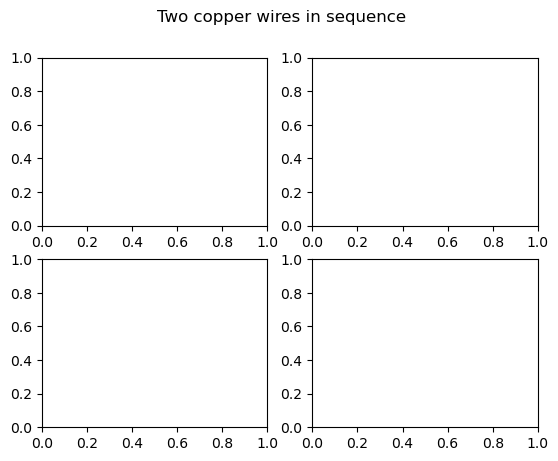

In [57]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Two copper wires in sequence")
voltage_plot = axs[0, 0]
current_plot = axs[0, 1]
energy_plot = axs[1, 0]
resistance_plot = axs[1, 1]
t, Vx, Vy = importData("Cu1_Cu2.CSV")

current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# voltage_plot.plot(t[start:end], voltage[start:end], '.')
voltage_plot.plot(t, voltage, '.')
voltage_plot.set_xlabel('Time [s]')
voltage_plot.set_ylabel('Voltage [V]')
voltage_plot.grid()

current_plot.plot(t[start:end], current[start:end], '.')
current_plot.plot(t, current, '.')
current_plot.set_xlabel('Time [s]')
current_plot.set_ylabel('Current [A]')
current_plot.grid()

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

# resistance_plot.plot(t[start:end], sliced_resistance, '.')
resistance_plot.plot(t, resistance, '.')
resistance_plot.set_xlabel('Time [s]')
resistance_plot.set_ylabel('Resistance [Ω]')
resistance_plot.grid()

energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Measurements', alpha=0.5)
energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
energy_plot.set_ylabel(r'Resistance [$\Omega$]')
energy_plot.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
C:\Users\local_dan.k\Temp\ipykernel_21612\4231514737.py:16: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('Resistance [$\Omega$]')


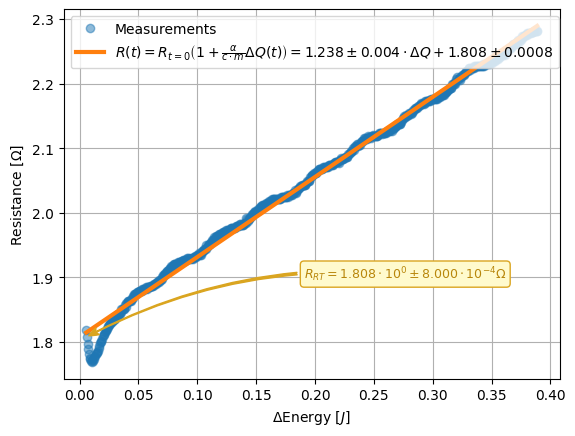

In [14]:
t, Vx, Vy = importData("Cu1_Cu2.CSV")


current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

plt.plot(sliced_energy, sliced_resistance, 'o', label='Measurements', alpha=0.5)
plt.xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
plt.ylabel('Resistance [$\Omega$]')
plt.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)
copper_sequence = (t[:], energy[:])

plt.plot(sliced_energy, x_lin, '-', label = fr"$R(t) = R_{{t=0}}\left(1+\frac{{\alpha}}{{c \cdot m}} \Delta Q(t)\right)= {slope:.3f} \pm {slope_err:.3f} \cdot \Delta Q + {intercept:.3f} \pm {intercept_err:.4f}$"
, linewidth=3,)
intercept_str = (
    rf"{f'{intercept:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept:.3e}'.split('e')[1])}}}"
    rf" \pm "
    rf"{f'{intercept_err:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept_err:.3e}'.split('e')[1])}}}"
)


plt.annotate(
    rf'$R_{{RT}} = {intercept_str}\Omega$',
    xy=(sliced_energy[0], intercept),     # Data point (x, y)
    xytext=(sliced_energy.mean(), intercept * 1.05),  # Annotation text position
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=2
)
plt.legend(loc="upper left")
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

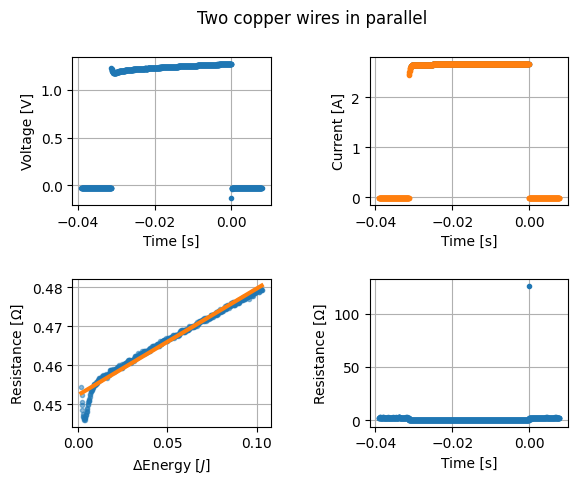

In [15]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Two copper wires in parallel")
voltage_plot = axs[0, 0]
current_plot = axs[0, 1]
energy_plot = axs[1, 0]
resistance_plot = axs[1, 1]
t, Vx, Vy = importData("Cu1_Cu2_parallel_better.CSV")

current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# voltage_plot.plot(t[start:end], voltage[start:end], '.')
voltage_plot.plot(t, voltage, '.')
voltage_plot.set_xlabel('Time [s]')
voltage_plot.set_ylabel('Voltage [V]')
voltage_plot.grid()

current_plot.plot(t[start:end], current[start:end], '.')
current_plot.plot(t, current, '.')
current_plot.set_xlabel('Time [s]')
current_plot.set_ylabel('Current [A]')
current_plot.grid()

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

# resistance_plot.plot(t[start:end], sliced_resistance, '.')
resistance_plot.plot(t, resistance, '.')
resistance_plot.set_xlabel('Time [s]')
resistance_plot.set_ylabel('Resistance [Ω]')
resistance_plot.grid()
copper_parallel = (t[:], energy[:])

energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Measurements', alpha=0.5)
energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
energy_plot.set_ylabel(r'Resistance [$\Omega$]')
energy_plot.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
C:\Users\local_dan.k\Temp\ipykernel_21612\3055575300.py:16: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('Resistance [$\Omega$]')


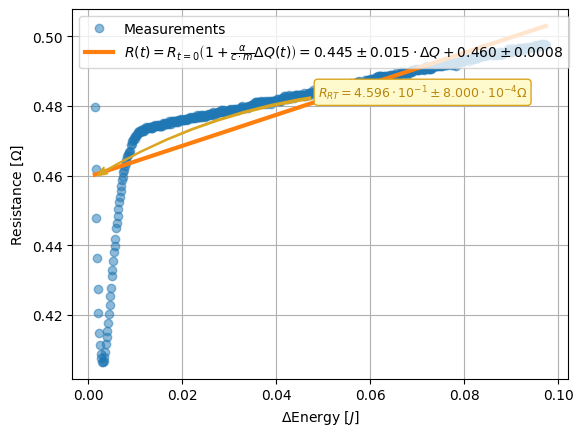

In [16]:
t, Vx, Vy = importData("Cu1_Cu2_parallel.CSV")


current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

plt.plot(sliced_energy, sliced_resistance, 'o', label='Measurements', alpha=0.5)
plt.xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
plt.ylabel('Resistance [$\Omega$]')
plt.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

plt.plot(sliced_energy, x_lin, '-', label = fr"$R(t) = R_{{t=0}}\left(1+\frac{{\alpha}}{{c \cdot m}} \Delta Q(t)\right)= {slope:.3f} \pm {slope_err:.3f} \cdot \Delta Q + {intercept:.3f} \pm {intercept_err:.4f}$"
, linewidth=3,)
intercept_str = (
    rf"{f'{intercept:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept:.3e}'.split('e')[1])}}}"
    rf" \pm "
    rf"{f'{intercept_err:.3e}'.split('e')[0]} \cdot 10^{{{int(f'{intercept_err:.3e}'.split('e')[1])}}}"
)


plt.annotate(
    rf'$R_{{RT}} = {intercept_str}\Omega$',
    xy=(sliced_energy[0], intercept),     # Data point (x, y)
    xytext=(sliced_energy.mean(), intercept * 1.05),  # Annotation text position
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=2
)
plt.legend(loc="upper left")
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

NameError: name 'copper_sequence' is not defined

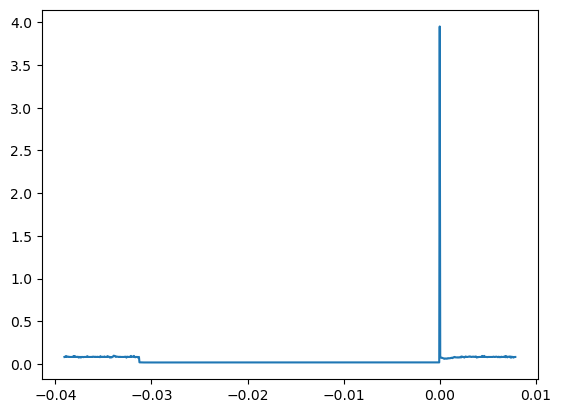

In [58]:
plt.plot(copper_only[0], copper_only[1], label="One copper wire")
plt.plot(copper_sequence[0], copper_sequence[1], label="Two copper wires in sequence")
plt.plot(copper_parallel[0] , copper_parallel[1], label="Two copper wires in parallel")
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Dissipated energy [J]")
plt.legend()
plt.show()

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> האם כל הקבצים (קבצי מדידות (csv), קבצי עיבוד, תמונות...) הועלו למודל?
</div>